# Data Exploration for weather.csv

In [10]:
import seaborn as sb
import numpy as np
import pandas as pd

In [11]:
# Read the weather.csv file
weather = pd.read_csv('../data/weather.csv')

In [12]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


#### Figuring out the null values

In [13]:
# COunt the number of missing values in each column
weather.isnull().sum()

date                                 0
max_temperature_f                    4
mean_temperature_f                   4
min_temperature_f                    4
max_dew_point_f                     54
mean_dew_point_f                    54
min_dew_point_f                     54
max_humidity                        54
mean_humidity                       54
min_humidity                        54
max_sea_level_pressure_inches        1
mean_sea_level_pressure_inches       1
min_sea_level_pressure_inches        1
max_visibility_miles                13
mean_visibility_miles               13
min_visibility_miles                13
max_wind_Speed_mph                   1
mean_wind_speed_mph                  1
max_gust_speed_mph                 899
precipitation_inches                 1
cloud_cover                          1
events                            3143
wind_dir_degrees                     1
zip_code                             0
dtype: int64

In [14]:
weather.shape

(3665, 24)

#### For some of the columns, there seems to be a lot of null values, especially for events. Apart from that, there are certain dates for which there are small number of NaN values.

In [15]:
weather.events

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3660    NaN
3661    NaN
3662    NaN
3663    NaN
3664    NaN
Name: events, Length: 3665, dtype: object

In [16]:
# Show events column from weather where value not NaN
weather.events[weather.events.notnull()]

14       Fog
23      Rain
32       Fog
44       Fog
52       Fog
        ... 
3555    Rain
3582    Rain
3621    Rain
3633    Rain
3639    Rain
Name: events, Length: 522, dtype: object

In [17]:
# Unique elements for events column
weather.events.unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'rain', 'Rain-Thunderstorm'],
      dtype=object)

##### For the NaN values in the events column, initially we thought that it had a lot of Null values, but it seems like it simply is a normal day not belonging to any other weather event. So for ease of understanding, we will replace all the NaN values with 'clear_day', denoting a clear/normal day.

In [18]:
# Replace weather events NaN with 'clear_day'
weather.events.fillna('clear_day', inplace=True)

In [19]:
weather.events

0       clear_day
1       clear_day
2       clear_day
3       clear_day
4       clear_day
          ...    
3660    clear_day
3661    clear_day
3662    clear_day
3663    clear_day
3664    clear_day
Name: events, Length: 3665, dtype: object

In [20]:
# Rename weather events value 'Fog-Rain' to 'fog_rain'
weather.events.replace('Fog-Rain', 'fog_rain', inplace=True)

# Rename weather events value 'Rain-Thunderstorm' to 'rain_thunderstorm'
weather.events.replace('Rain-Thunderstorm', 'rain_thunderstorm', inplace=True)

# Rename weather events value 'Rain' to 'rain'
weather.events.replace('Rain', 'rain', inplace=True)

# Rename weather events value 'Fog' to 'fog'
weather.events.replace('Fog', 'fog', inplace=True)

In [21]:
# Get unique elements for events column
weather.events.unique()

array(['clear_day', 'fog', 'rain', 'fog_rain', 'rain_thunderstorm'],
      dtype=object)

##### Now, the events column seeems to be more friendly to work on.

In [22]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,clear_day,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,clear_day,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,clear_day,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,clear_day,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,clear_day,277.0,94107


##### We will now check the 'zip_code' column

In [23]:
# Show the uniuqe elements for the zip_code column
weather.zip_code.unique()

array([94107, 94063, 94301, 94041, 95113], dtype=int64)

##### There only seems to be 5 unique zip codes, which means that the dataset is only for these mentioned zip codes. We can possibly use these zip codes for demand analysis and prediction

In [24]:
# Get the distribution of the weather with rescpect to the zip_code
weather.zip_code.value_counts()


95113    733
94301    733
94107    733
94063    733
94041    733
Name: zip_code, dtype: int64

#### There seems to be equal numbers of data for each zip code. 

In [25]:
# Count null data for each column with respect to the zip_code
weather.groupby('zip_code')


In [26]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,clear_day,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,clear_day,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,clear_day,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,clear_day,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,clear_day,277.0,94107


In [27]:
# For each unique zip_code, get the count of null values for each column
weather.groupby('zip_code').apply(lambda x: x.isnull().sum())


,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
zip_code,,,,,,,,,,,,,,,,,,,,,
94041,0,3,3,3,3,3,3,3,3,3,...,0,0,0,0,9,0,0,0,0,0
94063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,412,0,0,0,0,0
94107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,13,0,0,0,0,0
94301,0,1,1,1,51,51,51,51,51,51,...,13,13,1,1,453,1,1,0,1,0
95113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12,0,0,0,0,0


<AxesSubplot:xlabel='zip_code'>

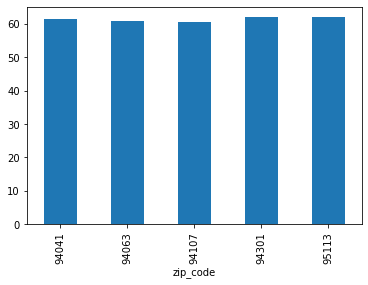

In [28]:
# Plot mean_temperature_f for each zip_code
weather.groupby('zip_code').mean_temperature_f.mean().plot(kind='bar')


# weather.groupby('zip_code').apply(lambda x: x.temperature.mean())


c:\Users\akaid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zip_code', ylabel='count'>

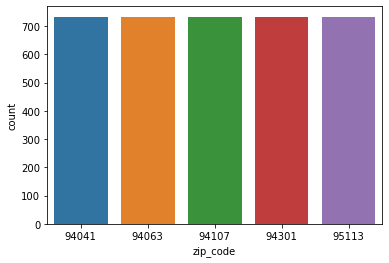

In [29]:
# Plot the distribution of zip code
sb.countplot(weather.zip_code)


In [30]:
# Print unique events
weather.events.unique()




array(['clear_day', 'fog', 'rain', 'fog_rain', 'rain_thunderstorm'],
      dtype=object)

c:\Users\akaid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='events', ylabel='count'>

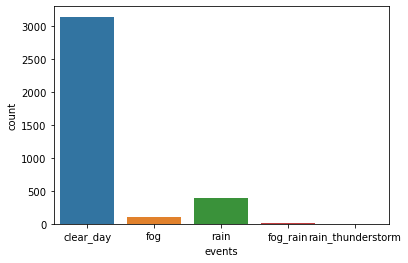

In [31]:
# Plot the distribution of events
sb.countplot(weather.events)


c:\Users\akaid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zip_code', ylabel='count'>

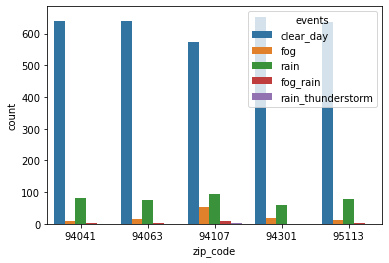

In [57]:
# Distribution of events with respect to zip_code
sb.countplot(weather.zip_code, hue=weather.events)


c:\Users\akaid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zip_code', ylabel='mean_temperature_f'>

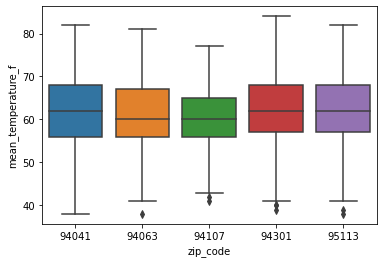

In [59]:
# Distribution of mean_temperature_f with respect to zip_code
sb.boxplot(weather.zip_code, weather.mean_temperature_f)


Zip code 94301 seems to have a lot of null values. 
Others have relatively smaller null values


In [32]:
# Get the datatype for each column
weather.dtypes

date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches               object
cloud_cover                       float64
events                             object
wind_dir_degrees                  float64
zip_code                          

In [33]:
# Check for null values in the weather dataframe
weather.isnull().sum()

date                                0
max_temperature_f                   4
mean_temperature_f                  4
min_temperature_f                   4
max_dew_point_f                    54
mean_dew_point_f                   54
min_dew_point_f                    54
max_humidity                       54
mean_humidity                      54
min_humidity                       54
max_sea_level_pressure_inches       1
mean_sea_level_pressure_inches      1
min_sea_level_pressure_inches       1
max_visibility_miles               13
mean_visibility_miles              13
min_visibility_miles               13
max_wind_Speed_mph                  1
mean_wind_speed_mph                 1
max_gust_speed_mph                899
precipitation_inches                1
cloud_cover                         1
events                              0
wind_dir_degrees                    1
zip_code                            0
dtype: int64

#### We see that there seem to be null values for 'precipitation_inches'. Assuming that this is a type conversion loss, we need to handle that.

In [34]:
# Replace the null values in the precipitation column with 0.0
weather.loc[weather.precipitation_inches.isnull(), 'precipitation_inches'] = 0.0

##### We see that all the datatypes are workable, except for precepication_inches. We need to handle that

In [35]:
# Change the datatype of the precipitation column to numpy float
weather.precipitation_inches = pd.to_numeric(weather.precipitation_inches, errors = 'coerce')

In [36]:
# Det datatype for weather
weather.dtypes

date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches              float64
cloud_cover                       float64
events                             object
wind_dir_degrees                  float64
zip_code                          

c:\Users\akaid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='events', ylabel='count'>

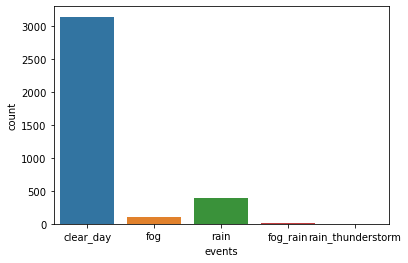

In [37]:
# plot distribution of events
sb.countplot(weather.events)


In [38]:
# Check for null values in the weather dataframe
weather.isnull().sum()

date                                0
max_temperature_f                   4
mean_temperature_f                  4
min_temperature_f                   4
max_dew_point_f                    54
mean_dew_point_f                   54
min_dew_point_f                    54
max_humidity                       54
mean_humidity                      54
min_humidity                       54
max_sea_level_pressure_inches       1
mean_sea_level_pressure_inches      1
min_sea_level_pressure_inches       1
max_visibility_miles               13
mean_visibility_miles              13
min_visibility_miles               13
max_wind_Speed_mph                  1
mean_wind_speed_mph                 1
max_gust_speed_mph                899
precipitation_inches              143
cloud_cover                         1
events                              0
wind_dir_degrees                    1
zip_code                            0
dtype: int64

In [39]:
# Replace the null values in the 'preciipication_inches' column with 0.0
weather.loc[weather.precipitation_inches.isnull(), 'precipitation_inches'] = 0.0

Now that we have the data, we can create separate sets for all zip codes so that we can predict the trips for each of them individually. 

##### Quick google search tells us:

Zip Code----------------------------City

94107 ------------------------------ SF<br>
94063 ------------------------------ SM (Redwood)<br>
94301 ------------------------------ SC<br>
94041 ------------------------------ MW<br>
95113 ------------------------------ SJ<br>


In [40]:
# Extract data where zip_code is 94107
weather_94107_SF = weather[weather.zip_code == 94107]

# Extract data where zip_code is 94063
weather_94063_Redwood = weather[weather.zip_code == 94063]

# Extract data where zip_code is 94301
weather_94301_PaloAlto = weather[weather.zip_code == 94301]

# Extract data where zip_code is 95014
weather_94041_MountainView = weather[weather.zip_code == 94041]

# Extract data where zip_code is 95113
weather_95113_SanJose = weather[weather.zip_code == 95113]

In [41]:
# Drop zip_code column from all the dataframes
weather_94107_SF.drop(['zip_code'], axis=1)
weather_94063_Redwood.drop(['zip_code'], axis=1)
weather_94301_PaloAlto.drop(['zip_code'], axis=1)
weather_94041_MountainView.drop(['zip_code'], axis=1)
weather_95113_SanJose.drop(['zip_code'], axis=1)


,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees
736,8/29/2013,81.0,72.0,63.0,62.0,61.0,59.0,87.0,69.0,51.0,...,10.0,10.0,10.0,16.0,7.0,24.0,0.0,4.0,clear_day,320.0
737,8/30/2013,88.0,76.0,63.0,63.0,60.0,55.0,93.0,65.0,37.0,...,10.0,10.0,10.0,18.0,5.0,22.0,0.0,2.0,clear_day,316.0
738,8/31/2013,80.0,71.0,62.0,59.0,57.0,54.0,90.0,66.0,42.0,...,10.0,10.0,10.0,18.0,8.0,22.0,0.0,0.0,clear_day,309.0
739,9/1/2013,81.0,72.0,62.0,61.0,57.0,51.0,84.0,62.0,39.0,...,10.0,10.0,10.0,20.0,7.0,24.0,0.0,2.0,clear_day,308.0
740,9/2/2013,79.0,73.0,66.0,62.0,61.0,59.0,81.0,68.0,54.0,...,10.0,10.0,10.0,21.0,8.0,25.0,0.0,5.0,rain,315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,8/27/2015,92.0,78.0,63.0,57.0,51.0,40.0,78.0,48.0,18.0,...,10.0,10.0,10.0,23.0,6.0,29.0,0.0,3.0,clear_day,313.0
3661,8/28/2015,95.0,80.0,64.0,64.0,56.0,52.0,93.0,60.0,26.0,...,10.0,10.0,10.0,25.0,7.0,30.0,0.0,3.0,clear_day,307.0
3662,8/29/2015,80.0,72.0,64.0,65.0,62.0,54.0,93.0,70.0,47.0,...,10.0,10.0,10.0,21.0,9.0,26.0,0.0,4.0,clear_day,312.0
3663,8/30/2015,78.0,70.0,62.0,60.0,57.0,53.0,84.0,64.0,43.0,...,10.0,10.0,10.0,22.0,10.0,29.0,0.0,3.0,clear_day,291.0


In [42]:
# Get the count of null values in all
weather_94107_SF.isnull().sum()

date                               0
max_temperature_f                  0
mean_temperature_f                 0
min_temperature_f                  0
max_dew_point_f                    0
mean_dew_point_f                   0
min_dew_point_f                    0
max_humidity                       0
mean_humidity                      0
min_humidity                       0
max_sea_level_pressure_inches      0
mean_sea_level_pressure_inches     0
min_sea_level_pressure_inches      0
max_visibility_miles               0
mean_visibility_miles              0
min_visibility_miles               0
max_wind_Speed_mph                 0
mean_wind_speed_mph                0
max_gust_speed_mph                13
precipitation_inches               0
cloud_cover                        0
events                             0
wind_dir_degrees                   0
zip_code                           0
dtype: int64

##?? gust sped ?

In [43]:
weather_94107_SF.loc[weather_94107_SF.max_gust_speed_mph.isnull(), 'max_gust_speed_mph'] = weather_94107_SF.max_wind_Speed_mph
weather_94063_Redwood.loc[weather_94063_Redwood.max_gust_speed_mph.isnull(), 'max_gust_speed_mph'] = weather_94063_Redwood.max_wind_Speed_mph
weather_94301_PaloAlto.loc[weather_94301_PaloAlto.max_gust_speed_mph.isnull(), 'max_gust_speed_mph'] = weather_94301_PaloAlto.max_wind_Speed_mph
weather_94041_MountainView.loc[weather_94041_MountainView.max_gust_speed_mph.isnull(), 'max_gust_speed_mph'] = weather_94041_MountainView.max_wind_Speed_mph
weather_95113_SanJose.loc[weather_95113_SanJose.max_gust_speed_mph.isnull(), 'max_gust_speed_mph'] = weather_95113_SanJose.max_wind_Speed_mph


c:\Users\akaid\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [44]:
# Get the count of null values in all
weather_94107_SF.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
dtype: int64

In [45]:
# Get the count of null values in all
weather_94063_Redwood.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
dtype: int64

##### Now assuming we have handled the null values, we need to note that out of the entire data, we should be fine with filling in these values with other features.

In [46]:
# Get the count of null values in all
weather_94301_PaloAlto.isnull().sum()

date                               0
max_temperature_f                  1
mean_temperature_f                 1
min_temperature_f                  1
max_dew_point_f                   51
mean_dew_point_f                  51
min_dew_point_f                   51
max_humidity                      51
mean_humidity                     51
min_humidity                      51
max_sea_level_pressure_inches      1
mean_sea_level_pressure_inches     1
min_sea_level_pressure_inches      1
max_visibility_miles              13
mean_visibility_miles             13
min_visibility_miles              13
max_wind_Speed_mph                 1
mean_wind_speed_mph                1
max_gust_speed_mph                 1
precipitation_inches               0
cloud_cover                        1
events                             0
wind_dir_degrees                   1
zip_code                           0
dtype: int64

In [47]:
# From weather_94301_PaloAlto, drop data where max_temperature_f is null
weather_94301_PaloAlto.dropna(subset=['max_temperature_f'], inplace=True)

<ipython-input-47-bf9ebedcae68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_94301_PaloAlto.dropna(subset=['max_temperature_f'], inplace=True)


In [48]:
# Count null vals.
weather_94301_PaloAlto.isnull().sum()

date                               0
max_temperature_f                  0
mean_temperature_f                 0
min_temperature_f                  0
max_dew_point_f                   50
mean_dew_point_f                  50
min_dew_point_f                   50
max_humidity                      50
mean_humidity                     50
min_humidity                      50
max_sea_level_pressure_inches      0
mean_sea_level_pressure_inches     0
min_sea_level_pressure_inches      0
max_visibility_miles              12
mean_visibility_miles             12
min_visibility_miles              12
max_wind_Speed_mph                 0
mean_wind_speed_mph                0
max_gust_speed_mph                 0
precipitation_inches               0
cloud_cover                        0
events                             0
wind_dir_degrees                   0
zip_code                           0
dtype: int64

In [49]:
weather_94301_PaloAlto.shape

(732, 24)

##### It could be possible that we will not be able to predict for Palo Alto since there are some datas that are null as well as the other ones.

In [50]:
# Get the count of null values in all
weather_94041_MountainView.isnull().sum()

date                              0
max_temperature_f                 3
mean_temperature_f                3
min_temperature_f                 3
max_dew_point_f                   3
mean_dew_point_f                  3
min_dew_point_f                   3
max_humidity                      3
mean_humidity                     3
min_humidity                      3
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
dtype: int64

In [51]:
# Get the count of null values in all
weather_95113_SanJose.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
dtype: int64

##### Except for Palo Alto, all the others seem to have no null values, now that we handled the cases in the cells above.

In [52]:
# Sort each dataframe by date
weather_94107_SF = weather_94107_SF.sort_values(by='date')
weather_94063_Redwood = weather_94063_Redwood.sort_values(by='date')
weather_94301_PaloAlto = weather_94301_PaloAlto.sort_values(by='date')
weather_94041_MountainView = weather_94041_MountainView.sort_values(by='date')
weather_95113_SanJose = weather_95113_SanJose.sort_values(by='date')


In [53]:
weather_94107_SF.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
125,1/1/2014,56.0,49.0,41.0,45.0,40.0,36.0,83.0,69.0,55.0,...,9.0,7.0,9.0,1.0,10.0,0.0,3.0,clear_day,290.0,94107
1962,1/1/2015,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,20.0,...,10.0,10.0,23.0,8.0,28.0,0.0,1.0,clear_day,40.0,94107
134,1/10/2014,60.0,54.0,48.0,48.0,46.0,43.0,89.0,75.0,60.0,...,9.0,6.0,15.0,6.0,17.0,0.0,4.0,clear_day,310.0,94107
1971,1/10/2015,60.0,54.0,47.0,52.0,49.0,45.0,93.0,83.0,72.0,...,7.0,4.0,8.0,3.0,10.0,0.0,6.0,fog,280.0,94107
135,1/11/2014,58.0,52.0,46.0,51.0,46.0,42.0,93.0,83.0,72.0,...,10.0,6.0,18.0,6.0,22.0,0.0,4.0,clear_day,281.0,94107


In [54]:
# Reset head of each dataframe
weather_94107_SF.reset_index(drop=True, inplace=True)
weather_94063_Redwood.reset_index(drop=True, inplace=True)
weather_94301_PaloAlto.reset_index(drop=True, inplace=True)
weather_94041_MountainView.reset_index(drop=True, inplace=True)
weather_95113_SanJose.reset_index(drop=True, inplace=True)


In [55]:
# Get the head of each dataframe
weather_94107_SF.head()


,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,1/1/2014,56.0,49.0,41.0,45.0,40.0,36.0,83.0,69.0,55.0,...,9.0,7.0,9.0,1.0,10.0,0.0,3.0,clear_day,290.0,94107
1,1/1/2015,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,20.0,...,10.0,10.0,23.0,8.0,28.0,0.0,1.0,clear_day,40.0,94107
2,1/10/2014,60.0,54.0,48.0,48.0,46.0,43.0,89.0,75.0,60.0,...,9.0,6.0,15.0,6.0,17.0,0.0,4.0,clear_day,310.0,94107
3,1/10/2015,60.0,54.0,47.0,52.0,49.0,45.0,93.0,83.0,72.0,...,7.0,4.0,8.0,3.0,10.0,0.0,6.0,fog,280.0,94107
4,1/11/2014,58.0,52.0,46.0,51.0,46.0,42.0,93.0,83.0,72.0,...,10.0,6.0,18.0,6.0,22.0,0.0,4.0,clear_day,281.0,94107


#### Now that we have our data, we can save it to files for use

In [56]:
# Save each dataframe to a csv file
weather_94107_SF.to_csv('../data/weather_94107_SF.csv', index=False)
weather_94063_Redwood.to_csv('../data/weather_94063_Redwood.csv', index=False)
weather_94301_PaloAlto.to_csv('../data/weather_94301_PaloAlto.csv', index=False)
weather_94041_MountainView.to_csv('../data/weather_94041_MountainView.csv', index=False)
weather_95113_SanJose.to_csv('../data/weather_95113_SanJose.csv', index=False)
